In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA for cluster.csv")

In [4]:
[i for i in df.columns]

['Unnamed: 0',
 'household_key',
 'individual_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_sta

In [5]:
dict_vars = {
    'fsv_any_pred_01': 'fsv_any_pred_clust',
    'new_any_pred_01': 'new_any_pred_clust',
    'cmsi_pred_01': 'cmsi_pred_clust',
    'credit_pred_01': 'credit_pred_clust',
    'id_pred_01': 'credit_pred_clust',
    'fsv_rare_pred_01': 'fsv_rare_pred_clust',
    'ins_pred_01': 'ins_pred_clust',
    'trv_pred_01': 'trv_pred_clust'
}

Replace predictions by ones where new products were actually purchased

In [6]:
df = df.assign(fsv_any_pred_clust = df.fsv_any_pred_01)
cond_fsv = ~(df.fsv_any == 1)
df.fsv_any_pred_clust = df['fsv_any_pred_clust'].where(cond_fsv,1)

In [7]:
df.fsv_any_pred_01.describe()

count    3562.000000
mean        0.250979
std         0.126603
min         0.028240
25%         0.155324
50%         0.230584
75%         0.327922
max         0.813206
Name: fsv_any_pred_01, dtype: float64

In [8]:
df.fsv_any_pred_clust.describe()

count    3562.000000
mean        0.422440
std         0.347774
min         0.028240
25%         0.164191
50%         0.265030
75%         0.645954
max         1.000000
Name: fsv_any_pred_clust, dtype: float64

In [9]:
df = df.assign(new_any_pred_clust = df.new_any_pred_01)
cond = ~(df['new_product_any'] == 1)
df.new_any_pred_clust = df['new_any_pred_clust'].where(cond,1)

In [10]:
df = df.assign(cmsi_pred_clust = df.cmsi_pred_01)
cond = ~(df['fsv_cmsi_flag_y'] == 1)
df.cmsi_pred_clust = df['cmsi_pred_clust'].where(cond,1)

In [11]:
df = df.assign(credit_pred_clust = df.credit_pred_01)
cond = ~(df['fsv_credit_card_flag_y'] == 1)
df.credit_pred_clust = df['credit_pred_clust'].where(cond,1)

In [12]:
df = df.assign(id_pred_clust = df.id_pred_01)
cond = ~(df['fsv_id_theft_flag_y'] == 1)
df.id_pred_clust = df['id_pred_clust'].where(cond,1)

In [13]:
df = df.assign(fsv_rare_pred_clust = df.fsv_rare_pred_01)
cond = ~(df['fsv_rare_dummy'] == 1)
df.fsv_rare_pred_clust = df['fsv_rare_pred_clust'].where(cond,1)

In [14]:
df = df.assign(ins_pred_clust = df.ins_pred_01)
cond = ~(df['ins_client_flag_y'] == 1)
df.ins_pred_clust = df['ins_pred_clust'].where(cond,1)

In [15]:
df = df.assign(trv_pred_clust = df.trv_pred_01)
cond = ~(df['trv_globalware_flag_y'] == 1)
df.trv_pred_clust = df['trv_pred_clust'].where(cond,1)

In [16]:
cols_clust_00 = [
    'expected_costs',
    'rs_pred_01',
    'cmsi_pred_clust',
    'credit_pred_clust',
    'credit_pred_clust',
    'fsv_rare_pred_clust',
    'ins_pred_clust',
    'trv_pred_clust'
]

In [17]:
cols_clust_01 = [
    'expected_costs',
    'rs_pred_01',
    'fsv_any_pred_clust',
    'ins_pred_clust',
    'trv_pred_clust'
]

In [18]:
cols_clust_02 = [
    'expected_costs',
    'rs_pred_01',
    'new_any_pred_01',
]

In [19]:
cols_clust_10 = [
    'costs_cond_04',
    'rs_pred_01',
    'cmsi_pred_clust',
    'credit_pred_clust',
    'credit_pred_clust',
    'fsv_rare_pred_clust',
    'ins_pred_clust',
    'trv_pred_clust'
]
cols_clust_11 = [
    'costs_cond_04',
    'rs_pred_01',
    'fsv_any_pred_clust',
    'ins_pred_clust',
    'trv_pred_clust'
]
cols_clust_12 = [
    'costs_cond_04',
    'rs_pred_01',
    'new_any_pred_01',
]

In [20]:
cols_clust_20 = [
    'rs_pred_01',
    'cmsi_pred_clust',
    'credit_pred_clust',
    'credit_pred_clust',
    'fsv_rare_pred_clust',
    'ins_pred_clust',
    'trv_pred_clust'
]
cols_clust_21 = [
    'rs_pred_01',
    'fsv_any_pred_clust',
    'ins_pred_clust',
    'trv_pred_clust'
]
cols_clust_22 = [
    'rs_pred_01',
    'new_any_pred_01',
]

In [21]:
df_clust_00 = df[cols_clust_00]
df_clust_01 = df[cols_clust_01]
df_clust_02 = df[cols_clust_02]
df_clust_10 = df[cols_clust_10]
df_clust_11 = df[cols_clust_11]
df_clust_12 = df[cols_clust_12]
df_clust_20 = df[cols_clust_20]
df_clust_21 = df[cols_clust_21]
df_clust_22 = df[cols_clust_22]

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
df_clust_00_std = scaler.fit_transform(df_clust_00)
df_clust_01_std = scaler.fit_transform(df_clust_01)
df_clust_02_std = scaler.fit_transform(df_clust_02)
df_clust_10_std = scaler.fit_transform(df_clust_10)
df_clust_11_std = scaler.fit_transform(df_clust_11)
df_clust_12_std = scaler.fit_transform(df_clust_12)
df_clust_20_std = scaler.fit_transform(df_clust_20)
df_clust_21_std = scaler.fit_transform(df_clust_21)
df_clust_22_std = scaler.fit_transform(df_clust_22)

In [25]:
pca = PCA(n_components = 2)

In [26]:
clust_to_check = [
    df_clust_00,
    df_clust_01,
    df_clust_02,
    df_clust_10,
    df_clust_11,
    df_clust_12,
    df_clust_20,
    df_clust_21,
    df_clust_22,
    df_clust_00_std,
    df_clust_01_std,
    df_clust_02_std,
    df_clust_10_std,
    df_clust_11_std,
    df_clust_12_std,
    df_clust_20_std,
    df_clust_21_std,
    df_clust_22_std
]

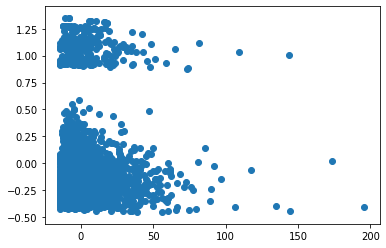

In [27]:
reduced_data = pca.fit_transform(df_clust_00)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 clusters

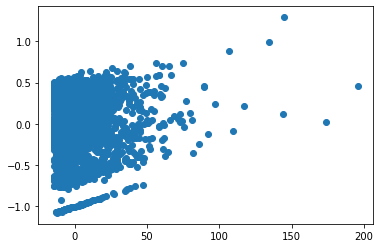

In [28]:
reduced_data = pca.fit_transform(df_clust_01)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 or 3 clusters

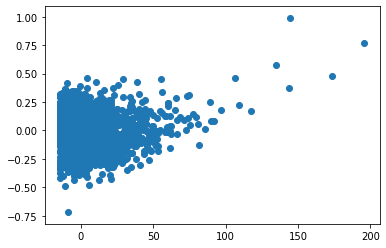

In [29]:
reduced_data = pca.fit_transform(df_clust_02)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

1 cluster

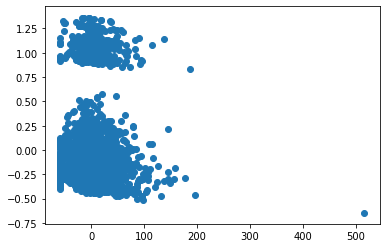

In [30]:
reduced_data = pca.fit_transform(df_clust_10)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 clusters

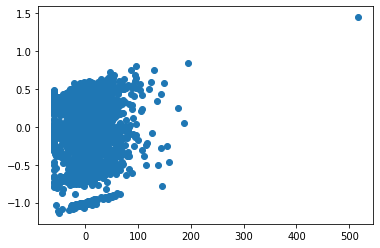

In [31]:
reduced_data = pca.fit_transform(df_clust_11)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 clusters

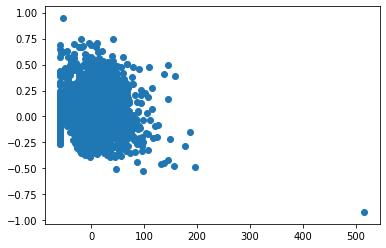

In [32]:
reduced_data = pca.fit_transform(df_clust_12)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

1 or 2 clusters

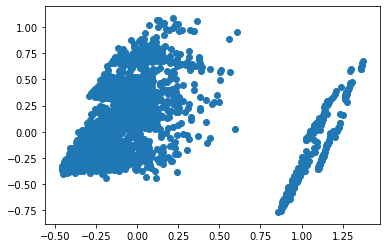

In [33]:
reduced_data = pca.fit_transform(df_clust_20)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 or 3 clusters

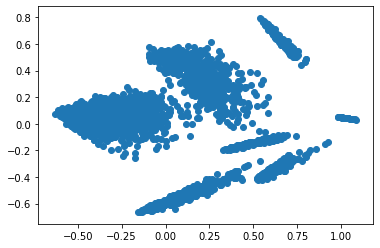

In [34]:
reduced_data = pca.fit_transform(df_clust_21)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

Up to 7 clusters

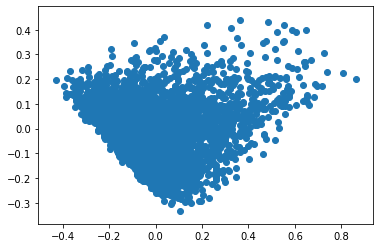

In [35]:
reduced_data = pca.fit_transform(df_clust_22)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

1 cluster

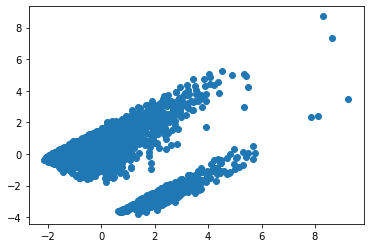

In [36]:
reduced_data = pca.fit_transform(df_clust_00_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 clusters

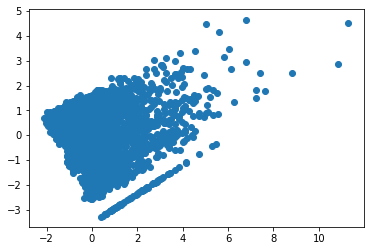

In [37]:
reduced_data = pca.fit_transform(df_clust_01_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 clusters

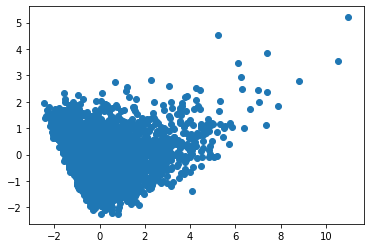

In [38]:
reduced_data = pca.fit_transform(df_clust_02_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

1 cluster

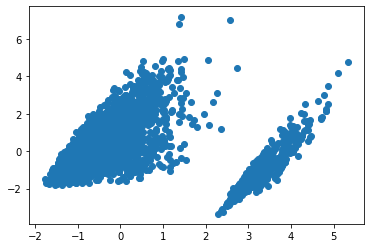

In [39]:
reduced_data = pca.fit_transform(df_clust_10_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 clusters

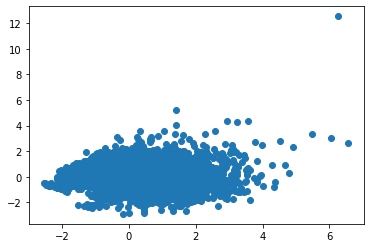

In [40]:
reduced_data = pca.fit_transform(df_clust_11_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

1 cluster

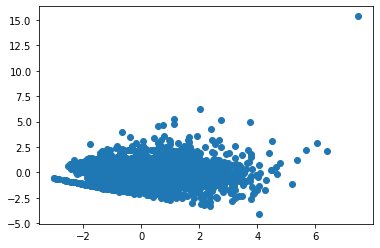

In [41]:
reduced_data = pca.fit_transform(df_clust_12_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 clusters

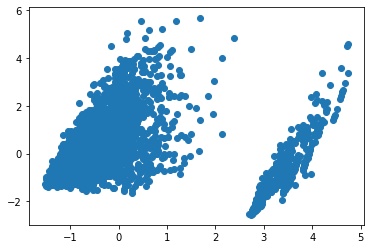

In [42]:
reduced_data = pca.fit_transform(df_clust_20_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

2 clusters

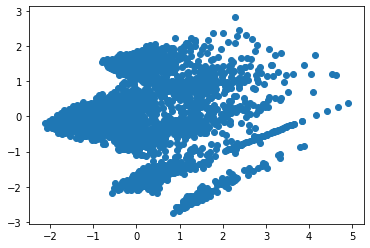

In [43]:
reduced_data = pca.fit_transform(df_clust_21_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

4 clusters

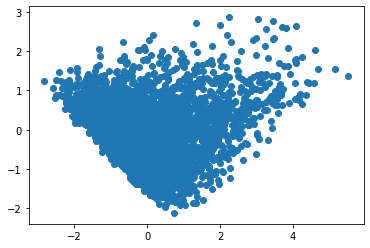

In [44]:
reduced_data = pca.fit_transform(df_clust_22_std)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

1 cluster

Most interesting configurations are 21 (up to 7 clusters) and 21_std (up to 4 clusters)

In [45]:
reduced_data = reduced_data = pca.fit_transform(df_clust_21)

In [46]:
kmeans = KMeans(n_clusters = 4).fit(reduced_data)
cluster_pred = kmeans.predict(reduced_data)

In [47]:
reduced_data_df = pd.DataFrame(reduced_data)

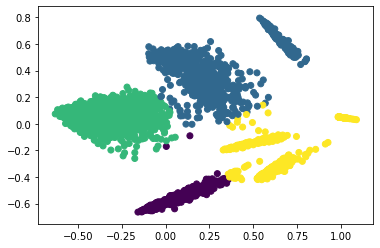

In [48]:
plt.scatter(reduced_data_df[0], reduced_data_df[1], c= kmeans.labels_.astype(float))

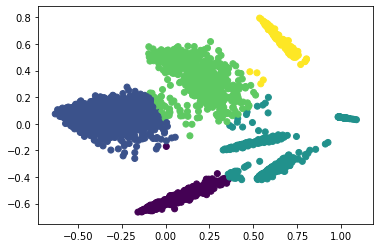

In [49]:
kmeans = KMeans(n_clusters = 5).fit(reduced_data)
cluster_pred = kmeans.predict(reduced_data)
reduced_data_df = pd.DataFrame(reduced_data)
plt.scatter(reduced_data_df[0], reduced_data_df[1], c= kmeans.labels_.astype(float))

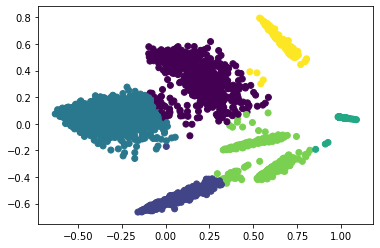

In [50]:
kmeans = KMeans(n_clusters = 6).fit(reduced_data)
cluster_pred = kmeans.predict(reduced_data)
reduced_data_df = pd.DataFrame(reduced_data)
plt.scatter(reduced_data_df[0], reduced_data_df[1], c= kmeans.labels_.astype(float))

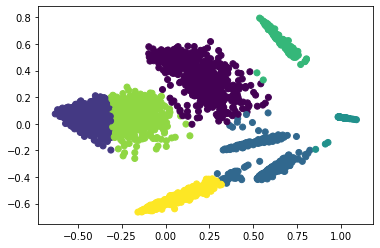

In [51]:
kmeans = KMeans(n_clusters = 7).fit(reduced_data)
cluster_pred = kmeans.predict(reduced_data)
reduced_data_df = pd.DataFrame(reduced_data)
plt.scatter(reduced_data_df[0], reduced_data_df[1], c= kmeans.labels_.astype(float))

7 does not work as I would like

Five clusters with data as they are

In [52]:
kmeans = KMeans(n_clusters = 5).fit(df_clust_21)
cluster_pred = kmeans.predict(df_clust_21)

In [53]:
cluster_labels = kmeans.labels_

In [54]:
df_cluster = pd.DataFrame(cluster_labels, columns = ['cluster_21'])

In [55]:
df_cluster.head()

,cluster_21
0,1
1,2
2,3
3,3
4,3


In [56]:
print(df.shape)
df = pd.concat([df, df_cluster], axis = 1)
df.shape

(3562, 276)


(3562, 277)

In [57]:
df.cluster_21.value_counts().sort_index()

0    1687
1     670
2     570
3     410
4     225
Name: cluster_21, dtype: int64

In [58]:
df_summary = df.groupby('cluster_21').mean()

In [59]:
df_summary.shape

(5, 276)

In [60]:
df_summary.tail()

,Unnamed: 0,household_key,individual_key,fsv_any,new_product_any,aaa_before_club_dummy,fin_missing,children_num,children_missing,credit_ranges_num,...,ins_pred_01,trv_pred_01,fsv_any_pred_clust,new_any_pred_clust,cmsi_pred_clust,credit_pred_clust,id_pred_clust,fsv_rare_pred_clust,ins_pred_clust,trv_pred_clust
cluster_21,,,,,,,,,,,,,,,,,,,,,
0,1794.981031,1.485922e+07,1.532306,0.00000,0.000000,0.070539,0.207469,0.539419,0.207469,4.049793,...,0.257983,0.155444,0.216147,0.478729,0.064536,0.116266,0.051772,0.008509,0.257983,0.155444
1,1725.138806,1.370494e+07,1.910448,0.98806,0.988060,0.097015,0.123881,0.708955,0.123881,4.564179,...,0.305827,0.199650,0.995657,0.998183,0.379864,0.588587,0.273700,0.055791,0.543683,0.199650
2,1906.519298,1.813054e+07,1.675439,0.00000,1.000000,0.056140,0.147368,0.664912,0.147368,4.384211,...,0.304584,0.167157,0.242915,1.000000,0.078223,0.132399,0.056956,0.008416,1.000000,0.167157
3,1707.229268,1.409145e+07,1.921951,0.00000,0.997561,0.087805,0.158537,0.734146,0.158537,4.434146,...,0.294419,0.205950,0.267171,0.999682,0.093765,0.131445,0.066768,0.010349,0.492748,0.998890
4,1651.044444,1.307018e+07,2.106667,1.00000,1.000000,0.084444,0.084444,0.808889,0.084444,4.911111,...,0.320230,0.242291,1.000000,1.000000,0.374319,0.664340,0.303639,0.042363,0.562108,0.996789


In [61]:
df_summary = df_summary.transpose()

In [62]:
df_summary.tail()

cluster_21,0,1,2,3,4
credit_pred_clust,0.116266,0.588587,0.132399,0.131445,0.664340
id_pred_clust,0.051772,0.273700,0.056956,0.066768,0.303639
fsv_rare_pred_clust,0.008509,0.055791,0.008416,0.010349,0.042363
ins_pred_clust,0.257983,0.543683,1.000000,0.492748,0.562108
trv_pred_clust,0.155444,0.199650,0.167157,0.998890,0.996789


In [63]:
export_csv = df_summary.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA clusters.csv")

SAME PROCEDURE WITH 21 STD

In [64]:
reduced_data = reduced_data = pca.fit_transform(df_clust_21_std)

In [65]:
kmeans = KMeans(n_clusters = 4).fit(reduced_data)
cluster_pred = kmeans.predict(reduced_data)

In [66]:
reduced_data_df = pd.DataFrame(reduced_data)

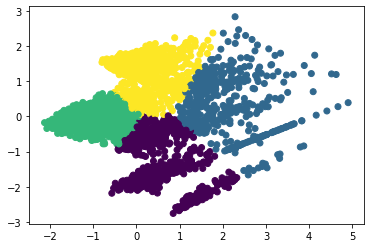

In [67]:
plt.scatter(reduced_data_df[0], reduced_data_df[1], c= kmeans.labels_.astype(float))

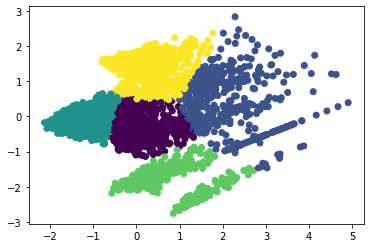

In [68]:
kmeans = KMeans(n_clusters = 5).fit(reduced_data)
cluster_pred = kmeans.predict(reduced_data)
reduced_data_df = pd.DataFrame(reduced_data)
plt.scatter(reduced_data_df[0], reduced_data_df[1], c= kmeans.labels_.astype(float))

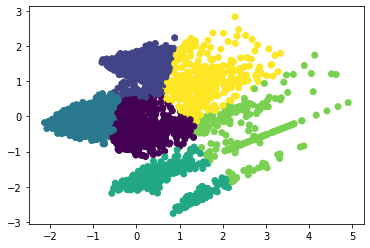

In [69]:
kmeans = KMeans(n_clusters = 6).fit(reduced_data)
cluster_pred = kmeans.predict(reduced_data)
reduced_data_df = pd.DataFrame(reduced_data)
plt.scatter(reduced_data_df[0], reduced_data_df[1], c= kmeans.labels_.astype(float))

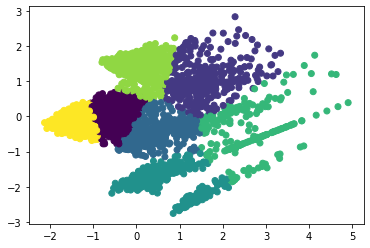

In [70]:
kmeans = KMeans(n_clusters = 7).fit(reduced_data)
cluster_pred = kmeans.predict(reduced_data)
reduced_data_df = pd.DataFrame(reduced_data)
plt.scatter(reduced_data_df[0], reduced_data_df[1], c= kmeans.labels_.astype(float))

Never separates lower clusters as I would like.
Either a different clustering procedure is needed or a different distance measure.
For submission, keep 21 only